# loss 설정

- 회귀 작업일 경우 'mse'
- 분류 작업일 경우 'sparse_categorical_crossentropy'
- 2진 분류 작업일 경우 'binary_crossentropy'

## 회귀 작업

loss를 'mse'로 설정한다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.boston_housing.load_data()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
11/11 [==============================] - 1s 30ms/step - loss: 7115.1851 - mae: 66.2347 - val_loss: 3790.2268 - val_mae: 43.5473
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 3640.5132 - mae: 40.9300 - val_loss: 1750.5332 - val_mae: 26.3665
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 1764.1041 - mae: 27.9485 - val_loss:

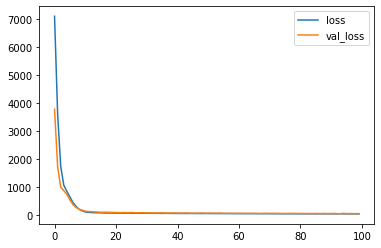

4/4 [==============================] - 0s 3ms/step - loss: 62.5770 - mae: 5.9316
loss= 62.57695770263672
mae= 5.931615352630615


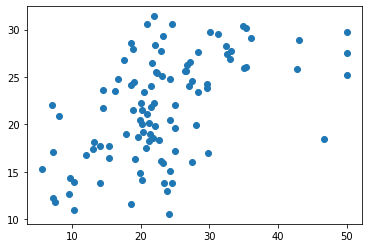

In [ ]:
# 모델 정의
model = keras.Sequential()
model.add(Input(13))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# 예측
y_ = model.predict(test_x)


# 예측 결과 보기
plt.scatter(test_y, y_)
plt.show()


## 분류 작업

loss를 'sparse_categorical_crossentropy'로 설정한다.

<br>

출력 데이터 y의 값은 category index 이어야 한다.

아래의 예에서의 train_y 값은 다음과 같다.
```
[1 0 2 1 1 0 1 0 1 2]
```

<br>

loss 이름 'sparse_categorical_crossentropy'에서<br> 'categorical'은 분류작업임을 의미하며,<br> 'sparse'는 y의 값이 category index임을 의미한다.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
def load_iris_data():

  df = pd.read_csv("https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/iris_with_category_index.csv")
  data = df.to_numpy()
  np.random.shuffle(data)

  x = data[:,:4]
  y = data[:,4]

  split_index = int(len(x)*0.8)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


In [ ]:
(train_x, train_y), (test_x, test_y) = load_iris_data()

In [ ]:
print(train_y[:10])

[1. 0. 1. 2. 1. 1. 1. 2. 2. 0.]


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1s 199ms/step - loss: 3.3494 - acc: 0.3026 - val_loss: 3.2936 - val_acc: 0.3000
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 3.1626 - acc: 0.3026 - val_loss: 3.1136 - val_acc: 0.3000
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 3.0006 - acc: 0.3026 - val_loss: 2.9464 - val_acc: 0.

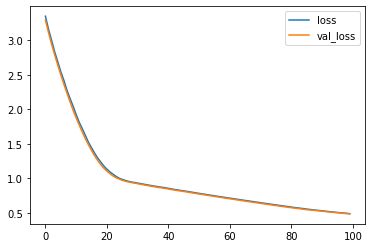

1/1 [==============================] - 0s 72ms/step - loss: 0.4431 - acc: 0.9583
loss= 0.4430950880050659
acc= 0.9583333134651184


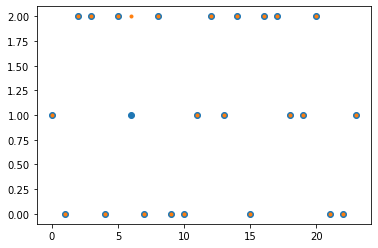

In [ ]:
# 모델 정의
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(1))
model.add(Dense(3, activation="softmax"))


# 모델 컴파일
# model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


# 예측
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)


# 예측 결과 보기
plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()


## 2진 분류 작업

loss를 'binary_crossentropy'로 설정한다.

<br>
출력 데이터 y의 값은 category index 이어야 한다.

2개 카테고리라서 category index값은 0,1 뿐이다.
```
[1 0 0 1 1 0 1 0 1 0]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
def load_sonar_data():

  df = pd.read_csv("https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/sonar.csv")
  data = df.to_numpy()
  np.random.shuffle(data)

  x = data[:,:60]
  y = data[:,60]

  split_index = int(len(x)*0.8)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


In [ ]:
(train_x, train_y), (test_x, test_y) = load_sonar_data()

In [ ]:
print(train_x.shape)
print(train_y.shape)

(165, 60)
(165,)


In [ ]:
print(train_x[0])
print(train_y[:10])

[0.0654 0.0649 0.0737 0.1132 0.2482 0.1257 0.1797 0.0989 0.246  0.3422
 0.2128 0.1377 0.4032 0.5684 0.2398 0.4331 0.5954 0.5772 0.8176 0.8835
 0.5248 0.6373 0.8375 0.6699 0.7756 0.875  0.83   0.6896 0.3372 0.6405
 0.7138 0.8202 0.6657 0.5254 0.296  0.0704 0.097  0.3941 0.6028 0.3521
 0.3924 0.4808 0.4602 0.4164 0.5438 0.5649 0.3195 0.2484 0.1299 0.0825
 0.0243 0.021  0.0361 0.0239 0.0447 0.0394 0.0355 0.044  0.0243 0.0098]
[1. 1. 0. 1. 0. 0. 1. 1. 1. 0.]


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                610       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 109ms/step - loss: 0.6937 - acc: 0.5076 - auc: 0.4084 - precision: 0.5462 - recall: 0.8553 - val_loss: 0.6947 - val_acc: 0.6061 - val_auc: 0.2520 - val_precision: 0.6250 - val_recall: 0.9524
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6886 - acc: 0.5758 - auc: 0.4638 - precision: 0.5758 - recall: 1.00

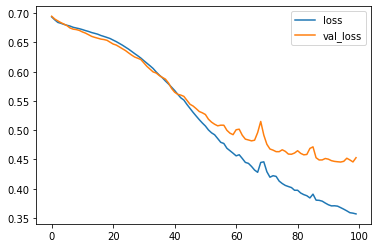

2/2 [==============================] - 0s 9ms/step - loss: 0.6891 - acc: 0.6190 - auc: 0.7526 - precision: 0.4545 - recall: 0.7143
loss= 0.6891434788703918
acc= 0.6190476417541504
auc= 0.7525509595870972
precision= 0.4545454680919647
recall= 0.7142857313156128


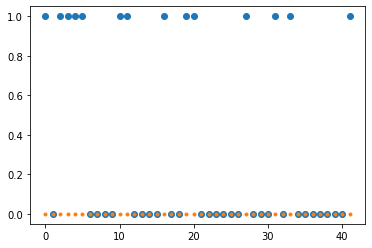

In [ ]:
from tensorflow.keras.metrics import AUC, Precision, Recall

# 모델 정의
model = keras.Sequential()
model.add(Input(60))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(3, activation="softmax"))
model.add(Dense(1, activation="sigmoid")) # 노드는 1개, activation은 "sigmoid"


# 모델 컴파일
# model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"] )
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["acc", "AUC", Precision(), Recall()])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, acc, auc, precision, recall = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
print("auc=", auc)
print("precision=", precision)
print("recall=", recall)


# 예측
y_ = model.predict(test_x)
predicted = (y_>0.5).astype(np.int)


# 예측 결과 보기
plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()


# 지표 설정

## 회귀 작업

"mae", "mape" 등을 설정할 수 있다.
- 'mae' : mean absolute error
- 'mape' : mean absolute percentage error

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.boston_housing.load_data()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
11/11 [==============================] - 1s 28ms/step - loss: 431.3896 - mae: 12.3779 - mape: 77.2216 - val_loss: 189.1593 - val_mae: 9.5992 - val_mape: 47.6948
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 212.0603 - mae: 10.7569 - mape: 60.9391 - val_loss: 123.3233 - val_mae: 8.0960 - val_mape: 36.3577
Epoch 3/100
11/11 [=====================

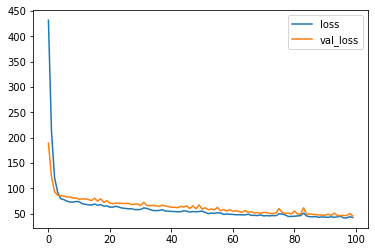

4/4 [==============================] - 0s 3ms/step - loss: 47.1403 - mae: 4.8185 - mape: 24.6284
loss= 47.14030456542969
mae= 4.818527698516846
mape= 24.62841796875


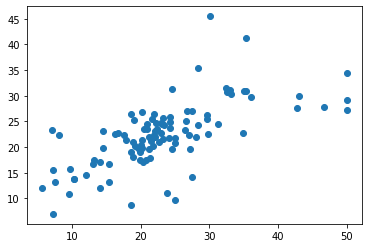

In [ ]:
# 모델 정의
model = keras.Sequential()
model.add(Input(13))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="Adam", loss="mse", metrics=["mae", "mape"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, mae, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
print("mape=", mape)


# 예측
y_ = model.predict(test_x)


# 예측 결과 보기
plt.scatter(test_y, y_)
plt.show()


## 분류 작업
일반적으로 정확도를 지표로 사용한다.
- 'acc' : accuracy, 정확도. 예측한 것중 정확히 예측한 비율.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
def load_iris_data():

  df = pd.read_csv("https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/iris_with_category_index.csv")
  data = df.to_numpy()
  np.random.shuffle(data)

  x = data[:,:4]
  y = data[:,4]

  split_index = int(len(x)*0.8)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


In [ ]:
(train_x, train_y), (test_x, test_y) = load_iris_data()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 0s 75ms/step - loss: 1.9523 - acc: 0.2895 - val_loss: 1.8090 - val_acc: 0.2000
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 1.8821 - acc: 0.2632 - val_loss: 1.7285 - val_acc: 0.2000
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 1.8160 - acc: 0.2368 - val_loss: 1.6557 - val_acc: 0.2

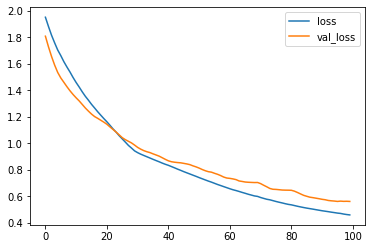

1/1 [==============================] - 0s 14ms/step - loss: 0.6298 - acc: 0.5833
loss= 0.6297639608383179
acc= 0.5833333134651184


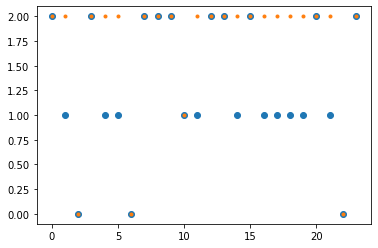

In [ ]:
# 모델 정의
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax"))


# 모델 컴파일
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


# 예측
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)


# 예측 결과 보기
plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()


## 2진 분류 작업

만약 카테고리가 2개 이면 다음 지표를 설정할 수 있다.
- 'AUC', or AUC() : area under curve, ROC 그래프의 곡선 아래 면적
- Precision() : 정밀도. 긍정이랴 예측한 것중 정확히 예측한 비율
- Recall() : 회수율. 긍정 정답 중에 찾아낸 비율


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
def load_sonar_data():

  df = pd.read_csv("https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/sonar.csv")
  data = df.to_numpy()
  np.random.shuffle(data)

  x = data[:,:60]
  y = data[:,60]

  split_index = int(len(x)*0.8)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


In [ ]:
(train_x, train_y), (test_x, test_y) = load_sonar_data()

In [ ]:
print(train_x.shape)
print(train_y.shape)

(165, 60)
(165,)


In [ ]:
print(train_x[0])
print(train_y[:10])

[0.0654 0.0649 0.0737 0.1132 0.2482 0.1257 0.1797 0.0989 0.246  0.3422
 0.2128 0.1377 0.4032 0.5684 0.2398 0.4331 0.5954 0.5772 0.8176 0.8835
 0.5248 0.6373 0.8375 0.6699 0.7756 0.875  0.83   0.6896 0.3372 0.6405
 0.7138 0.8202 0.6657 0.5254 0.296  0.0704 0.097  0.3941 0.6028 0.3521
 0.3924 0.4808 0.4602 0.4164 0.5438 0.5649 0.3195 0.2484 0.1299 0.0825
 0.0243 0.021  0.0361 0.0239 0.0447 0.0394 0.0355 0.044  0.0243 0.0098]
[1. 1. 0. 1. 0. 0. 1. 1. 1. 0.]


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                610       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 109ms/step - loss: 0.6937 - acc: 0.5076 - auc: 0.4084 - precision: 0.5462 - recall: 0.8553 - val_loss: 0.6947 - val_acc: 0.6061 - val_auc: 0.2520 - val_precision: 0.6250 - val_recall: 0.9524
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6886 - acc: 0.5758 - auc: 0.4638 - precision: 0.5758 - recall: 1.00

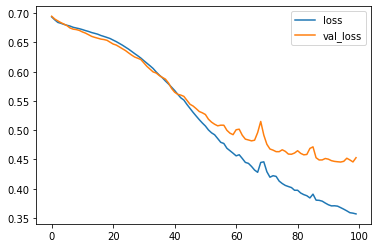

2/2 [==============================] - 0s 9ms/step - loss: 0.6891 - acc: 0.6190 - auc: 0.7526 - precision: 0.4545 - recall: 0.7143
loss= 0.6891434788703918
acc= 0.6190476417541504
auc= 0.7525509595870972
precision= 0.4545454680919647
recall= 0.7142857313156128


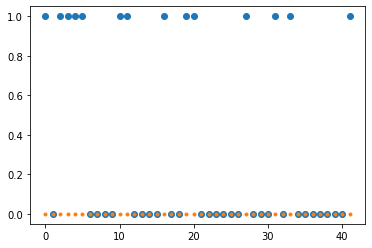

In [ ]:
from tensorflow.keras.metrics import AUC, Precision, Recall

# 모델 정의
model = keras.Sequential()
model.add(Input(60))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation="sigmoid"))


# 모델 컴파일
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["acc", "AUC", Precision(), Recall()])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)


# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()


# 평가
loss, acc, auc, precision, recall = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
print("auc=", auc)
print("precision=", precision)
print("recall=", recall)


# 예측
y_ = model.predict(test_x)
predicted = (y_>0.5).astype(np.int)


# 예측 결과 보기
plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()


# batch size 설정

model.fit() 호출 시 batch_size 파라매터로 설정한다.

2의 지수승의 값으로 하나씩 증가하면서 1 step의 처리 시간이 증가하기 바로 전의 batch size 값을 찾아낸다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar100.load_data()

In [ ]:
print(train_x.shape)

(50000, 32, 32, 3)


In [ ]:
# 모델 정의
model = keras.Sequential()
model.add(Input((32,32,3)))
model.add(Flatten())
model.add(Dense(1280, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation="softmax"))


# 모델 컴파일
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [ ]:
model.fit(train_x, train_y, epochs=3, batch_size=8, validation_split=0.2)

Epoch 1/3
5000/5000 [==============================] - 14s 3ms/step - loss: 4.8972 - acc: 0.0094 - val_loss: 4.6077 - val_acc: 0.0092
Epoch 2/3
5000/5000 [==============================] - 13s 3ms/step - loss: 4.6063 - acc: 0.0094 - val_loss: 4.6077 - val_acc: 0.0084
Epoch 3/3
5000/5000 [==============================] - 13s 3ms/step - loss: 4.6063 - acc: 0.0091 - val_loss: 4.6079 - val_acc: 0.0086


In [ ]:
model.fit(train_x, train_y, epochs=3, batch_size=16, validation_split=0.2)

Epoch 1/3
2500/2500 [==============================] - 8s 3ms/step - loss: 4.6058 - acc: 0.0091 - val_loss: 4.6080 - val_acc: 0.0077
Epoch 2/3
2500/2500 [==============================] - 8s 3ms/step - loss: 4.6059 - acc: 0.0101 - val_loss: 4.6079 - val_acc: 0.0086
Epoch 3/3
2500/2500 [==============================] - 8s 3ms/step - loss: 4.6059 - acc: 0.0091 - val_loss: 4.6078 - val_acc: 0.0083


In [ ]:
model.fit(train_x, train_y, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 5s 4ms/step - loss: 4.6055 - acc: 0.0100 - val_loss: 4.6078 - val_acc: 0.0083
Epoch 2/3
1250/1250 [==============================] - 4s 4ms/step - loss: 4.6056 - acc: 0.0099 - val_loss: 4.6079 - val_acc: 0.0085
Epoch 3/3
1250/1250 [==============================] - 4s 4ms/step - loss: 4.6056 - acc: 0.0096 - val_loss: 4.6078 - val_acc: 0.0077


In [ ]:
model.fit(train_x, train_y, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
625/625 [==============================] - 3s 5ms/step - loss: 4.6053 - acc: 0.0101 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 2/3
625/625 [==============================] - 2s 4ms/step - loss: 4.6053 - acc: 0.0102 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 3/3
625/625 [==============================] - 2s 4ms/step - loss: 4.6054 - acc: 0.0103 - val_loss: 4.6080 - val_acc: 0.0083


In [ ]:
model.fit(train_x, train_y, epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
313/313 [==============================] - 2s 5ms/step - loss: 4.6051 - acc: 0.0103 - val_loss: 4.6080 - val_acc: 0.0077
Epoch 2/3
313/313 [==============================] - 1s 5ms/step - loss: 4.6052 - acc: 0.0100 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 4.6052 - acc: 0.0095 - val_loss: 4.6079 - val_acc: 0.0077


In [ ]:
model.fit(train_x, train_y, epochs=3, batch_size=256, validation_split=0.2)

Epoch 1/3
157/157 [==============================] - 1s 5ms/step - loss: 4.6050 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 2/3
157/157 [==============================] - 1s 5ms/step - loss: 4.6050 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 3/3
157/157 [==============================] - 1s 5ms/step - loss: 4.6050 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077


In [ ]:
model.fit(train_x, train_y, epochs=3, batch_size=512, validation_split=0.2)

Epoch 1/3
79/79 [==============================] - 1s 7ms/step - loss: 4.6049 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 2/3
79/79 [==============================] - 0s 5ms/step - loss: 4.6050 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077
Epoch 3/3
79/79 [==============================] - 0s 5ms/step - loss: 4.6049 - acc: 0.0106 - val_loss: 4.6079 - val_acc: 0.0077


batch_size 256일 때 4ms 였던 것이 512일때 8ms로 증가했다. 

256를 batch_size로 설정한다.

# 기타 설정/방법

## verbose 설정

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [ ]:
# 모델 정의
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation="softmax"))


# 모델 컴파일
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [ ]:
model.fit(train_x, train_y, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.2412 - acc: 0.2490 - val_loss: 1.6546 - val_acc: 0.3640
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.5498 - acc: 0.3998 - val_loss: 1.4620 - val_acc: 0.4218
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3655 - acc: 0.4465 - val_loss: 1.3047 - val_acc: 0.4717
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2683 - acc: 0.4716 - val_loss: 1.2376 - val_acc: 0.4617
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2150 - acc: 0.4958 - val_loss: 1.1642 - val_acc: 0.5267


In [ ]:
model.fit(train_x, train_y, epochs=5, batch_size=32, verbose=0, validation_split=0.2)

In [ ]:
model.fit(train_x, train_y, epochs=5, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.0498 - acc: 0.5915 - val_loss: 1.0476 - val_acc: 0.6012
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0397 - acc: 0.5981 - val_loss: 1.0284 - val_acc: 0.6072
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0286 - acc: 0.6025 - val_loss: 1.0274 - val_acc: 0.6053
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0206 - acc: 0.6049 - val_loss: 1.0221 - val_acc: 0.6127
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0093 - acc: 0.6085 - val_loss: 0.9891 - val_acc: 0.6066


In [ ]:
model.fit(train_x, train_y, epochs=5, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/5
1500/1500 - 3s - loss: 1.0069 - acc: 0.6112 - val_loss: 1.0233 - val_acc: 0.6157
Epoch 2/5
1500/1500 - 2s - loss: 0.9974 - acc: 0.6131 - val_loss: 0.9922 - val_acc: 0.6133
Epoch 3/5
1500/1500 - 2s - loss: 0.9899 - acc: 0.6164 - val_loss: 0.9718 - val_acc: 0.6143
Epoch 4/5
1500/1500 - 2s - loss: 0.9847 - acc: 0.6193 - val_loss: 0.9745 - val_acc: 0.6149
Epoch 5/5
1500/1500 - 3s - loss: 0.9647 - acc: 0.6242 - val_loss: 0.9697 - val_acc: 0.6264


## loss, 성능지표 그리기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [ ]:
# 모델 정의
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation="softmax"))


# 모델 컴파일
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=50, batch_size=256, validation_split=0.2)


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
188/188 [==============================] - 1s 4ms/step - loss: 6.3067 - acc: 0.1307 - val_loss: 2.2138 - val_acc: 0.1602
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 2.1422 - acc: 0.1862 - val_loss: 2.1142 - v

In [ ]:
# 평가
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5471 - acc: 0.8438
loss= 0.5471357107162476
acc= 0.8438000082969666


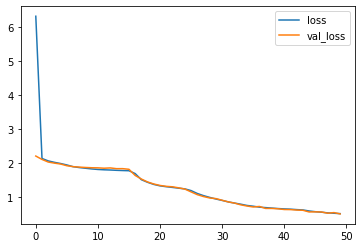

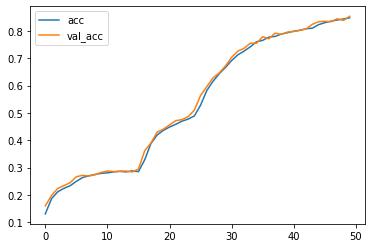

In [ ]:
# 학습 로스 보기
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

# 학습 로스 보기
plt.plot(history.history['acc'], label="acc")
plt.plot(history.history['val_acc'], label="val_acc")
plt.legend()
plt.show()


## 예측 결과 그리기

### 분류 작업

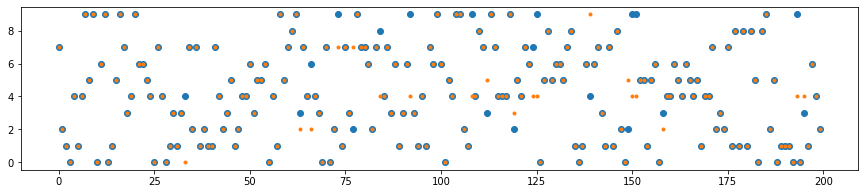

In [ ]:
# 예측
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)


# 예측 결과 보기
plt.figure(figsize=(15,3))
plt.plot(test_y[:200], "o")
plt.plot(predicted[:200], ".")
plt.show()

### 회귀 작업 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.boston_housing.load_data()

In [ ]:
# 모델 정의
model = keras.Sequential()
model.add(Input(13))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
model.summary()


# 모델 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


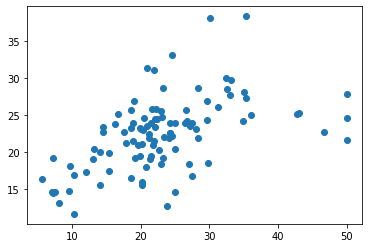

In [ ]:
# 예측
y_ = model.predict(test_x)


# 예측 결과 보기
plt.scatter(test_y, y_)
plt.show()
